## Image Analysis for SysCoFinder and Bayesian Optimization
Build on the Code from Hector Sánchez-Iranzo (IBCS-BIP, KIT)<br>
2022

## Introduction

This tool helps to investigate the amount of particles in a specific picture, by assigning them percentages of white and black color. 

This tutorial has been inspired by **[Hector Sánchez-Iranzo (IBCS-BIP, KIT)] course for the BIF-course in 2022 who was inspired by **[Jonas Hartmann's tutorial](https://github.com/WhoIsJack/python-bioimage-analysis-tutorial)**<br>
If you are interested in learning membrane segmentation, I strongly encourage you to complement this tutorial with Jonas' tutorial.

## 1. Importing modules

In [262]:
import numpy as np
from numpy import array
import matplotlib.pyplot as plt

import scipy.ndimage as ndi

from skimage.util import crop

from skimage.io import imread
import skimage.color

import os
import sys

from PIL import Image, ImageFont, ImageDraw 

## 2. Importing images

In [263]:
# (ii) Identify your current directory by typing: %pwd (print current directory)
# Currently the image has to be in the same folder as well!
%pwd

'C:\\Users\\Lenovo\\Documents\\PhD\\ESEM_Picture_Optimization\\ESEM-Pictures\\2022-11-01'

In [5192]:
# Change the current working directory
os.chdir('C:\\Users\\Lenovo\\Documents\\PhD\\ESEM_Picture_Optimization\\ESEM-Pictures\\2022-12-19')

# Print the current working directory
print("Current working directory: {0}".format(os.getcwd()))

Current working directory: C:\Users\Lenovo\Documents\PhD\ESEM_Picture_Optimization\ESEM-Pictures\2022-11-24(2)
Current working directory: C:\Users\Lenovo\Documents\PhD\ESEM_Picture_Optimization\ESEM-Pictures\2022-12-19


In [5193]:
img

array([[0.32941176, 0.31764706, 0.31372549, ..., 0.3254902 , 0.3254902 ,
        0.32941176],
       [0.32156863, 0.31372549, 0.31372549, ..., 0.32156863, 0.32156863,
        0.3254902 ],
       [0.3254902 , 0.3254902 , 0.3372549 , ..., 0.32156863, 0.34117647,
        0.32941176],
       ...,
       [0.07058824, 0.07058824, 0.07058824, ..., 0.10588235, 0.09803922,
        0.08627451],
       [0.07058824, 0.07058824, 0.07058824, ..., 0.09803922, 0.09411765,
        0.07058824],
       [0.07058824, 0.07058824, 0.06666667, ..., 0.09019608, 0.07058824,
        0.05882353]])

In [5548]:
# Load the image
image_name = "2022-12-19_EBB-SUR-31B_315deg_pic19.tif"
img = imread(image_name, as_gray=True)

## 3. Initial exploration of the image

In [5549]:
# Dimensions of the image?
img.shape

(1638, 2048)

In [5550]:
# and dtype
img.dtype

dtype('float64')

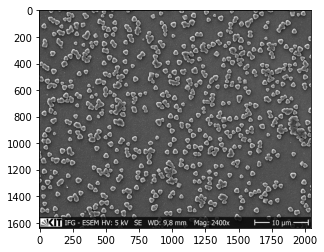

In [5551]:
# Look at the image by using 'plt.imshow'

plt.imshow(img, cmap="gray")
plt.show()


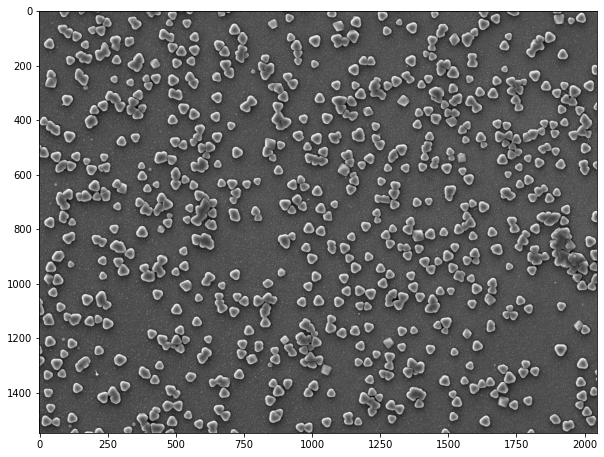

In [5552]:
# Change the display size if you want with plt.figure 
# The value of the argument should have the following format: (width, height).
# Cut unneccessar parts of the picture with crop()

plt.figure(figsize = (10,10))
cropped_img = crop(img, ((0, 90), (0, 0)), copy=True)
plt.imshow(cropped_img, cmap="gray")
plt.show()

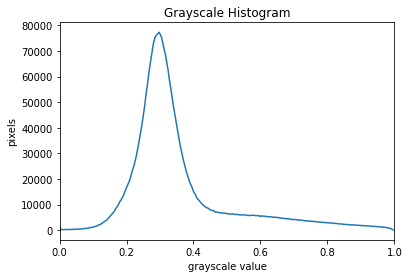

In [5553]:
histogram, bin_edges = np.histogram(cropped_img, bins=256, range=(0.0, 1.0))

fig, ax = plt.subplots()
plt.plot(bin_edges[0:-1], histogram)
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.xlim(0, 1.0)
plt.show()

## 4. Manual Thresholding & Threshold Detection <a id=thresh></a>

#### Background

Assign the threshold when the grayscale is over a certain level (means there are particles) T

In [5554]:
 threshold = 0.00

In [5555]:
# Perform thresholding on image
cropped_img_thres = cropped_img > threshold

# Check the dtype of your thresholded image --> should be boolean! True is the regions
# above the threshold = the particles and 'False' is the backgound

print(len(cropped_img_thres))
cropped_img_thres.dtype

1548


dtype('bool')

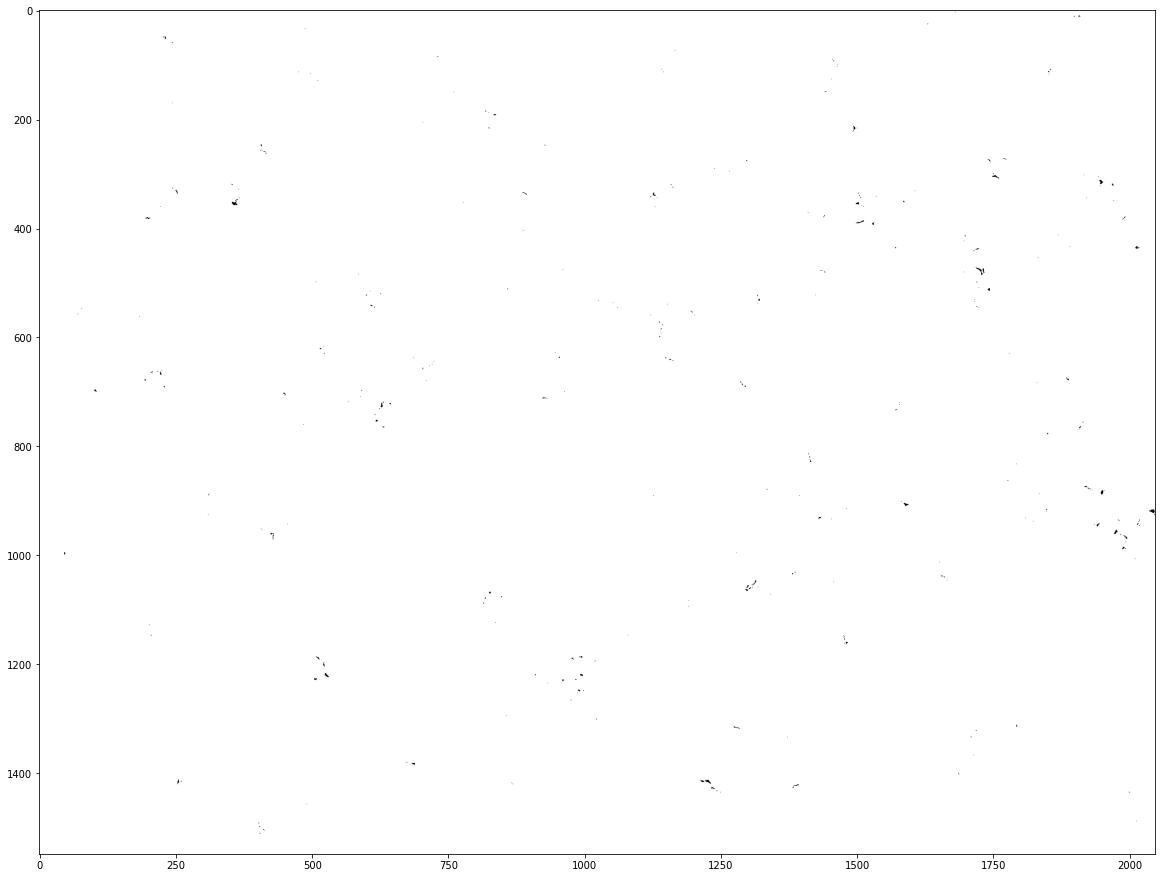

(1548, 2048)


In [5556]:
# Visualize the result

plt.figure(figsize = (20,20))
plt.imshow(cropped_img_thres, cmap = 'gray')
plt.show()
np.set_printoptions(threshold=10000)
print(cropped_img_thres.shape)

### Figuring out the Percentage of particles (gray in this picture (compared to black))

In [5557]:
# counting the number of pixels
number_of_white_pix = np.sum(cropped_img_thres == True)
number_of_black_pix = np.sum(cropped_img_thres == False)

percentage_of_particles = (np.sum(cropped_img_thres == True)/(np.sum(cropped_img_thres == False) + np.sum(cropped_img_thres == True))*100)
#percentage_of_particles1 = number_of_white_pix/(number_of_white_pix+number_of_black_pix)
myNumber = percentage_of_particles
RoundNumber_percentage_of_particles = round(myNumber, 2)

print('Number of white pixels:', number_of_white_pix)
print('Number of black pixels:', number_of_black_pix)
#percentage_of_particles_string = ('Percentage of white in the picture:', str(percentage_of_particles))
print('Percentage of white in the picture:', RoundNumber_percentage_of_particles)
#print('Percentage of white in the picture:', percentage_of_particles1)

Number of white pixels: 3168868
Number of black pixels: 1436
Percentage of white in the picture: 99.95


In [5558]:
title_font = ImageFont.truetype('C:\\Users\\Lenovo\\Documents\\PhD\\ESEM_Picture_Optimization\\Ubuntu\\Ubuntu-Bold.ttf', 50)
title_text = "The percentage of white is: " + str(RoundNumber_percentage_of_particles) + ",  The used threshold is: " + str(threshold) + "  "
title_text1 = "The percentage of white is: " + str(RoundNumber_percentage_of_particles)

In [5559]:
image = Image.fromarray(cropped_img_thres)

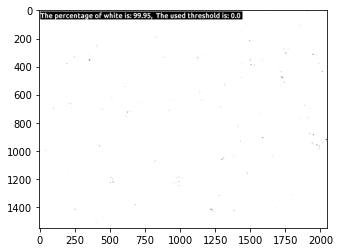

In [5560]:
width, height = image.width, image.height
draw = ImageDraw.Draw(image)
x, y = (width - 500, height-20)
w, h = title_font.getsize(title_text)
draw.rectangle((10, 10, 10 + w, 10 + h), fill='black')
draw.text((10, 10), title_text, fill='white', font=title_font)
plt.imshow(image, cmap = 'gray')
plt.show()

In [5561]:
image1 = Image.fromarray(cropped_img_thres)

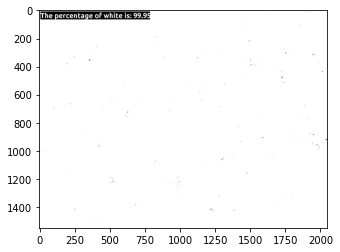

In [5562]:
width, height = image1.width, image1.height
draw = ImageDraw.Draw(image1)
x, y = (width - 500, height-20)
w, h = title_font.getsize(title_text1)
draw.rectangle((10, 10, 10 + w, 10 + h), fill='black')
draw.text((10, 10), title_text1, fill='white', font=title_font)
plt.imshow(image1, cmap = 'gray')
plt.show()

In [5563]:
image.save(image_name + "_processed_thres.jpg")
image1.save(image_name + "_processed.jpg")